# Serving Success: A Data-Driven Approach to Identifying Prime Restaurant Locations in Berlin
**Author:** [Piotr Kalbarczyk]  
**Date:** [19-12-2025]  

---

## Objective
The objective of this project is to apply data analytics and geospatial analysis to support location-based business decisions, specifically for the restaurant industry in Berlin. Hopefully I will demonstrate how data-driven approaches can optimize decision-making processes in urban environments.

---

## Overview of the Steps
1. **Data Collection:** Downloading demographic and geospatial data from reliable sources.
2. **Data Wrangling:** Cleaning and preparing data for analysis.
3. **Analysis:** Exploring insights and visualizations to answer the key questions.
4. **Conclusion:** Summarizing findings and providing actionable recommendations.

---

## Step 1: Data Collection
To ensure a reliable analysis, we sourced data from:
- **Demographic data:** [Statistik Berlin-Brandenburg](https://www.statistik-berlin-brandenburg.de/)  
  - Includes population distribution, density, and other metrics by district.
- **Geospatial data:** [OpenStreetMap](https://www.openstreetmap.org)  
  - The data includes `.shp` files for:
     - District boundaries.
     - Restaurant locations.
     - Transport hubs.
     - Residential areas.


Below are the steps for downloading and importing this data into our analysis environment.


## Step 2: Data Wrangling

To ensure accuracy and usability, the raw data was cleaned and prepared using multiple tools and techniques:

### Geospatial Data
1. **Opening and Visualizing in QGIS:**  
   The `.shp` files were loaded into **QGIS** for visualization and initial inspection. This allowed me to:
   - Verify the structure of the geospatial data.
   - Explore attribute tables for missing or inconsistent values.
   - Devide points of interest by neighbourhood.
   - Calculating areas and densities for polygons.

2. **Database Integration with PostgreSQL:**  
   Using QGIS, I connected to a **PostgreSQL** database and imported the cleaned `.shp` files into a spatial database.  
   - **Why PostgreSQL?**  
     PostgreSQL, with its PostGIS extension, is ideal for handling and analyzing geospatial data.

3. **Preparation in DBeaver:**  
   I used **DBeaver**, a database management tool, to write SQL scripts for cleaning and organizing the imported geospatial data.  
   - Example SQL tasks included:
     - Removing duplicate or irrelevant rows.
     - Standardizing attribute names.
   

### Demographic Data
1. **Excel for Initial Cleaning:**  
   The demographic data was processed in Excel to:
   - Combine all the Data into manageable parts.


---


## Data Wrangling: Cleaning Cuisine Types

One of the most time-consuming tasks in this project was cleaning and standardizing the "cuisine" column in the dataset. The raw data contained inconsistent and overlapping entries for restaurant types, which required careful processing to ensure accuracy and consistency.

For example some entries included multiple cuisines in a single row, separated by semicolons (e.g., `italian;ice_cream`).

### Challenges Encountered:
1. **Duplicates and Variations:** Many cuisines were represented in different formats or combined with other cuisines.
2. **Ambiguous Entries:** Some entries were unclear or needed manual categorization.
3. **Ensuring Consistency:** Each cuisine needed to be mapped to a single, standardized category.

### Cleaning Process
Using SQL scripts in PostgreSQL I queried the distinct cuisine types to understand the variations and inconsistencies:
   ```sql
   SELECT DISTINCT cuisine
   FROM restaurants_clean rc 
   WHERE cuisine IS NOT NULL AND cuisine LIKE '%ital%';

   
UPDATE restaurants_clean 
SET cuisine = 'italian'
WHERE cuisine IN (
                              'italian;ice_cream'
                          ,'italian;international'
                 ,'international;regional;italian'
                                        ,'italian'
                            ,'italian;steak_house'
                              ,'italian;sardinian'
                              ,'ice_cream;italian'
                                  ,'italian;pasta'
                                   ,'italian;wine'
                 );



## Step 3: Transition to Tableau for Analysis

Once all the data was cleaned, standardized, and prepared in PostgreSQL, the final datasets were exported to **Tableau** for visualization and further analysis. 


## Berlin: A Growing and Diverse City
Berlin is a city on the rise, and this growth is fueled by people from around the world. Over the past decade, the percentage of non-German residents has grown from 16% to 25%. This demographic shift brings not only growth but also greater cultural diversity, which is reflected in the city's vibrant restaurant scene.

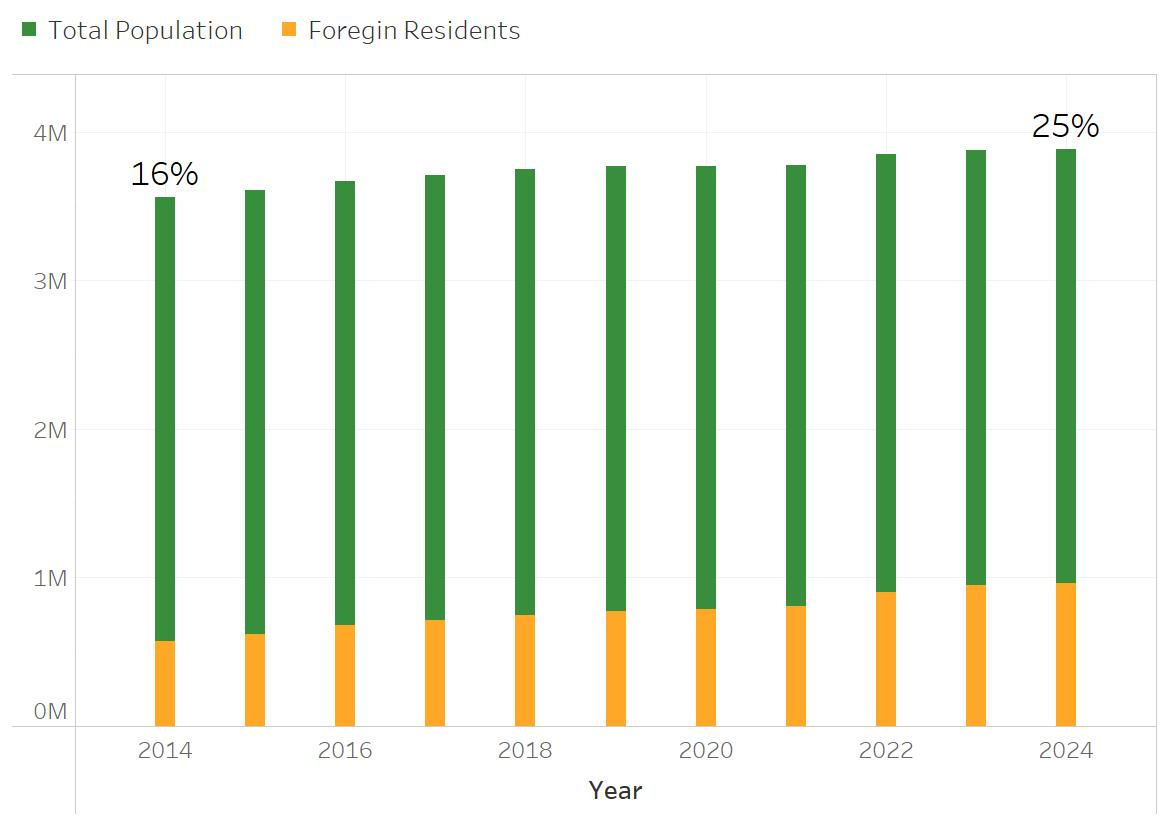

In [8]:

from IPython.display import Image, display
display(Image(filename='./04_Reveal_js/assets/01A_Population of Berlin.jpg'))

Here, we can see all 12 neighborhoods of Berlin along with their respective populations. To provide additional context, I’ve combined this data with the number of restaurants in each area, visually represented by pizza icons.

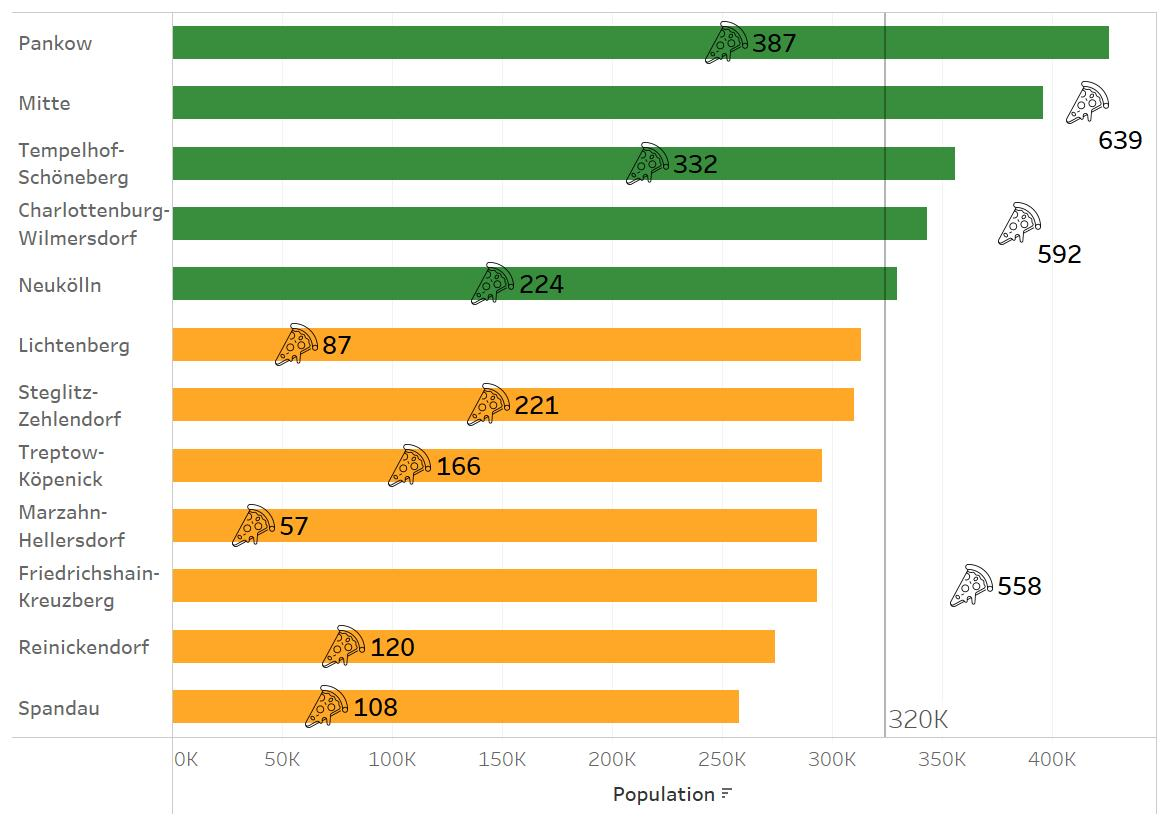

In [9]:

display(Image(filename='./04_Reveal_js/assets/02B_Populationvs number of restaurants.jpg'))

While some districts have large populations, the number of restaurants in these areas is not always proportional. This discrepancy raises questions about what truly drives the distribution of dining establishments across Berlin. To understand this better, we need to look at restaurant density, both in terms of population and area size.

When we combine population, restaurant density, and area size, some clear leaders emerge. Mitte, Charlottenburg, and Kreuzberg stand out as the top districts for dining. But interestingly, Schöneberg and Pankow also show strong potential, making them notable contenders in Berlin’s restaurant scene.

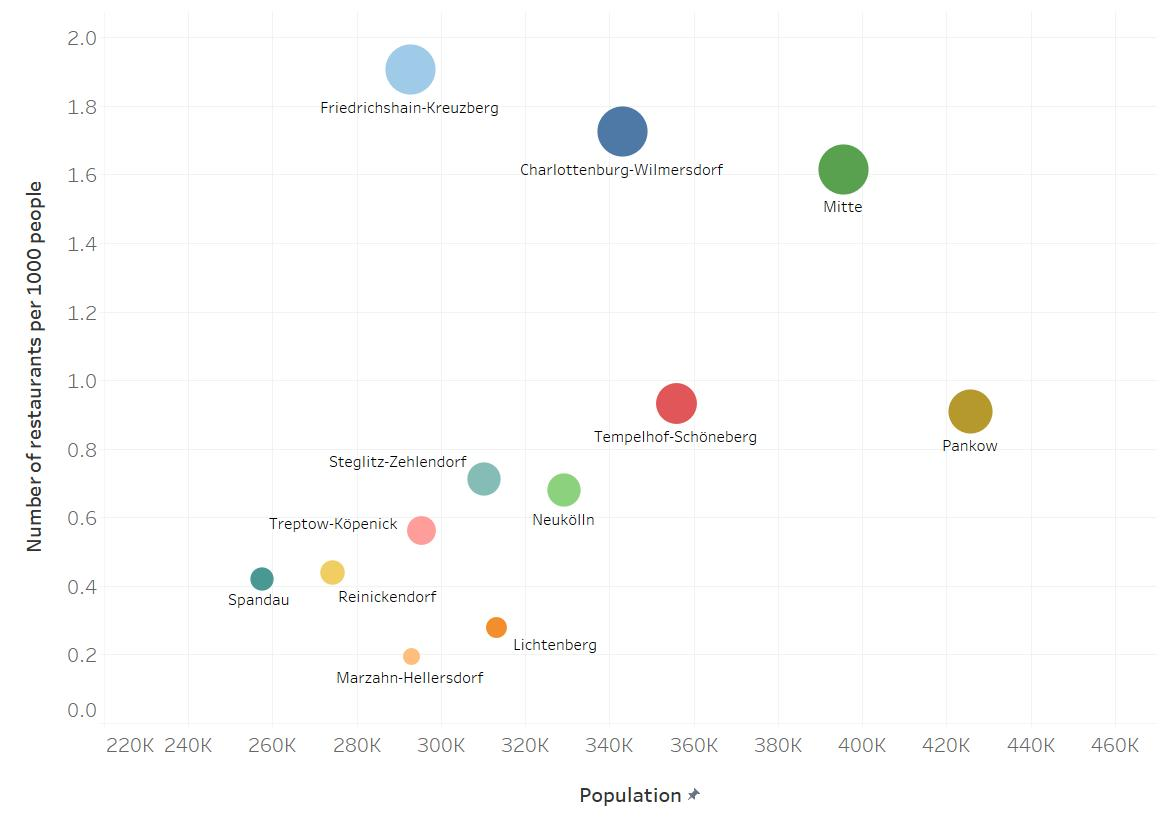

In [10]:

display(Image(filename='./04_Reveal_js/assets/07_Restaurants popularity.jpg'))

### Exploring Culinary Preferences: The Top Cuisines in Berlin?

Now that we’ve seen where restaurants thrive, let’s dive deeper into what cuisines are driving this popularity.

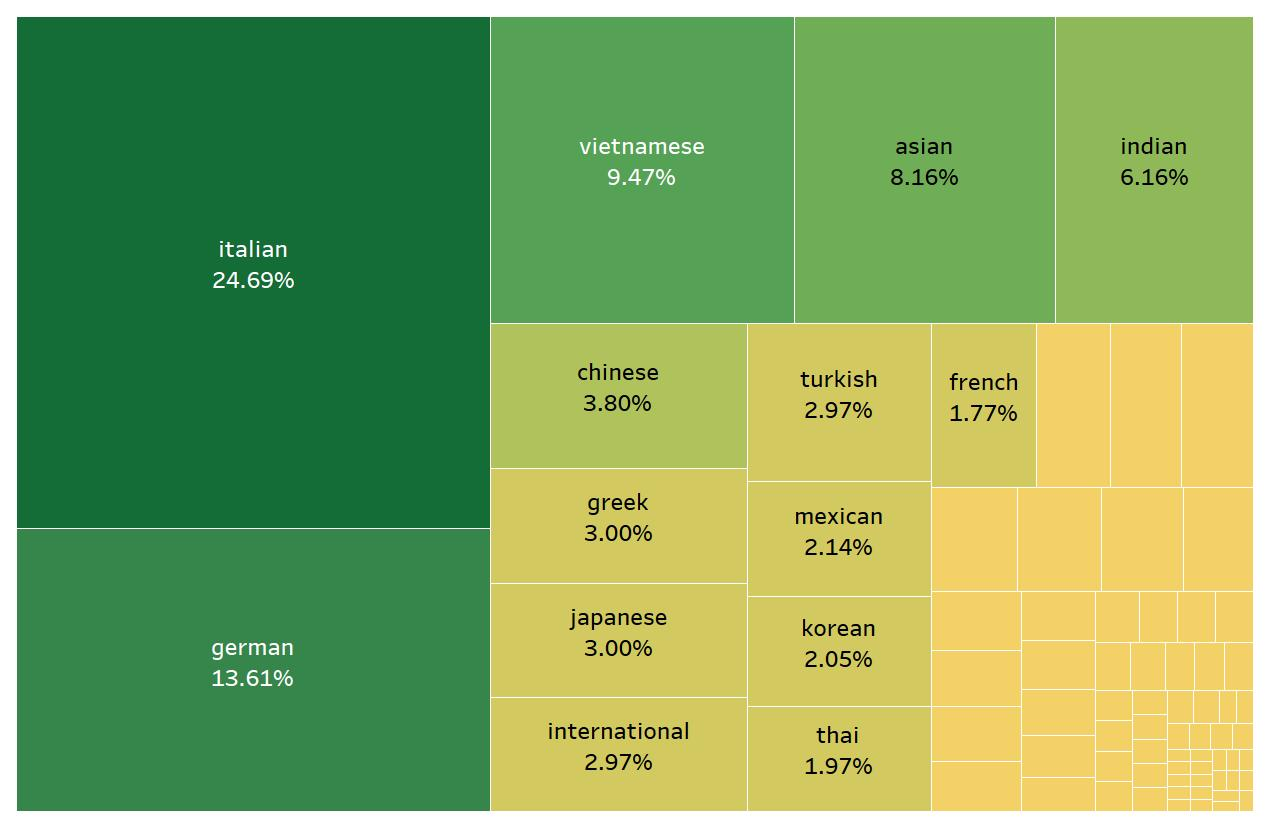

In [12]:

display(Image(filename='./04_Reveal_js/assets/03A_Cuisines tree map.jpg'))

Berlin’s culinary landscape is as diverse as its population. Italian, Turkish, and Vietnamese cuisines dominate the top spots, reflecting the city’s cultural blend and evolving food trends. But the story doesn’t stop there—let’s explore how diverse these districts really are.

### Are Cuisines Where Migrants Are?
Do cuisines reflect the populations they represent? By comparing the locations of Turkish, Croatian, and French restaurants with the respective communities, we see mixed patterns. 
The upper row represents number of restaurants and lower row the population of certain migrant group. The darker the colour the bigger the number.

For example, Turkish restaurants align closely with Turkish communities in Neukölln, but French restaurants are more concentrated in tourist-heavy areas like Mitte and Charlottenburg.

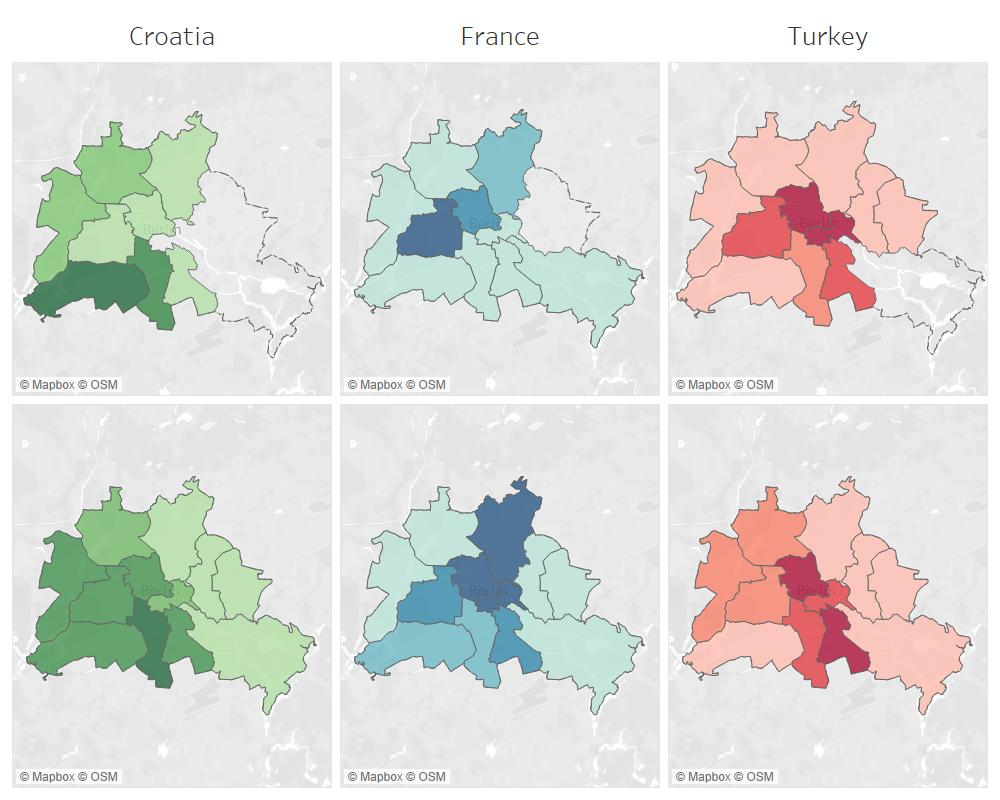

In [11]:

display(Image(filename='./04_Reveal_js/assets/08_Maps.jpg'))

When we look at these maps collectively, a striking pattern emerges: While these cuisines don’t always perfectly overlap with the locations of their respective communities, they tend to cluster in similar geographic directions. For instance, Turkish cuisine dominates the southern districts, Croatian restaurants favor the southwestern areas, and French establishments stretch from the north through Charlottenburg and Mitte. 

This highlights that demographics are just one piece of the puzzle. Let’s apply this to Anna’s case and identify the best districts for a Greek restaurant.

Using everything we’ve analyzed, we shortlist five districts: Mitte, Charlottenburg, Kreuzberg, Schöneberg, and Pankow. These districts represent areas where demand for dining might already be high or where opportunities for growth could still exist. By pinpointing districts that balance population, density, and accessibility, we can provide actionable insights for making informed business decisions. 

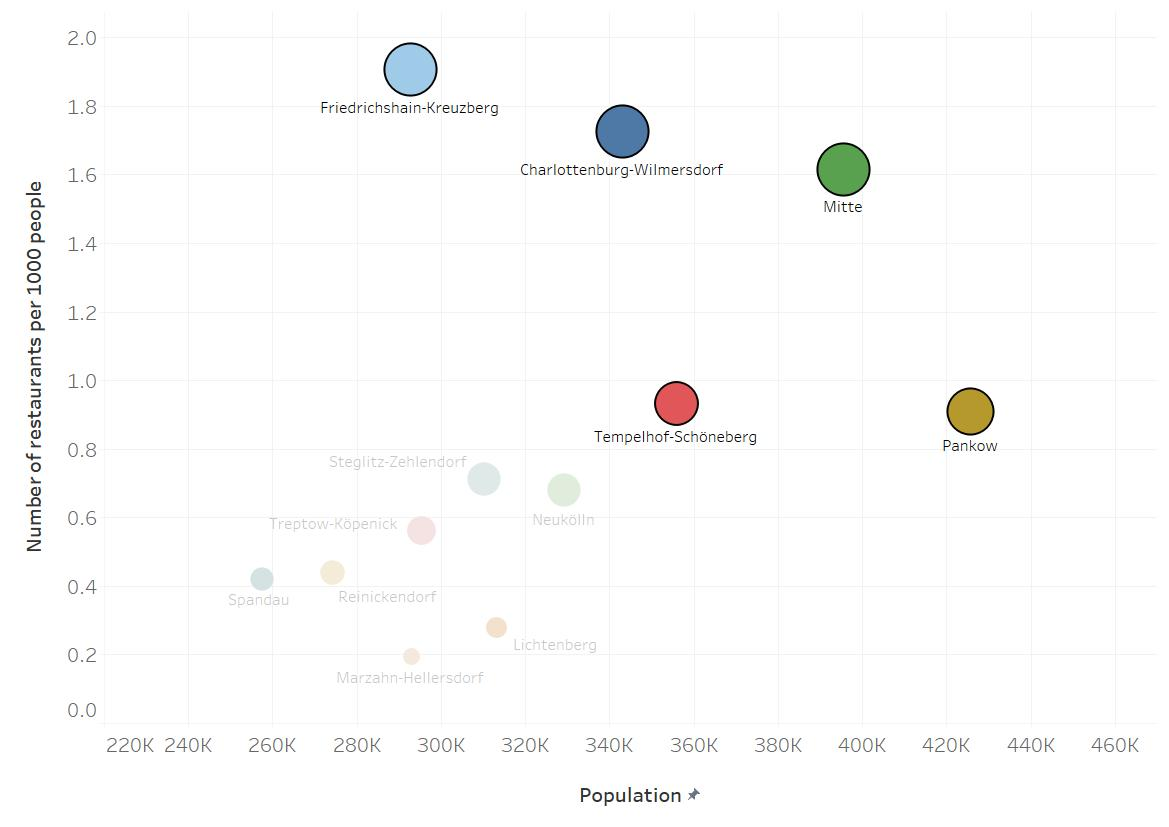

In [15]:

display(Image(filename='./04_Reveal_js/assets/09_Anna_Scatter.jpg'))

However, by focusing on the Greek population’s distribution (south_central) we can eliminate Pankow

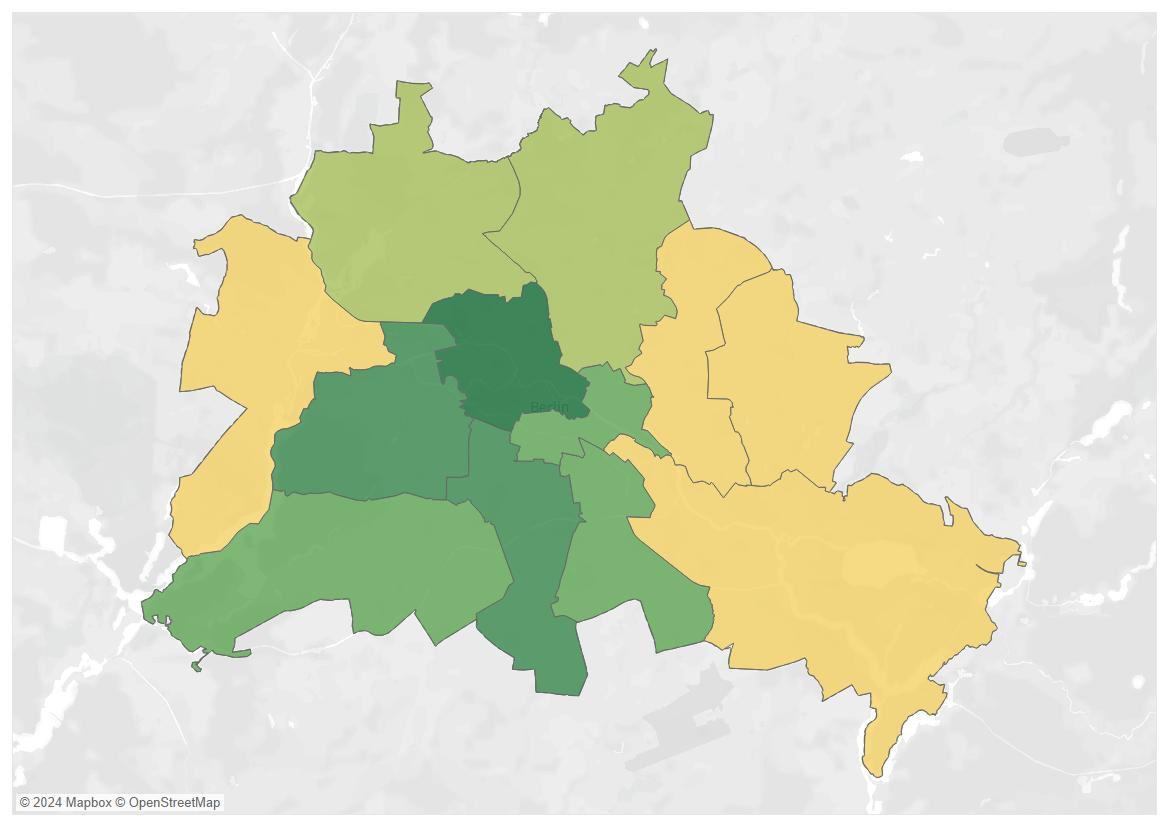

In [17]:

display(Image(filename='./04_Reveal_js/assets/010_Anna_MAP_01.jpg'))

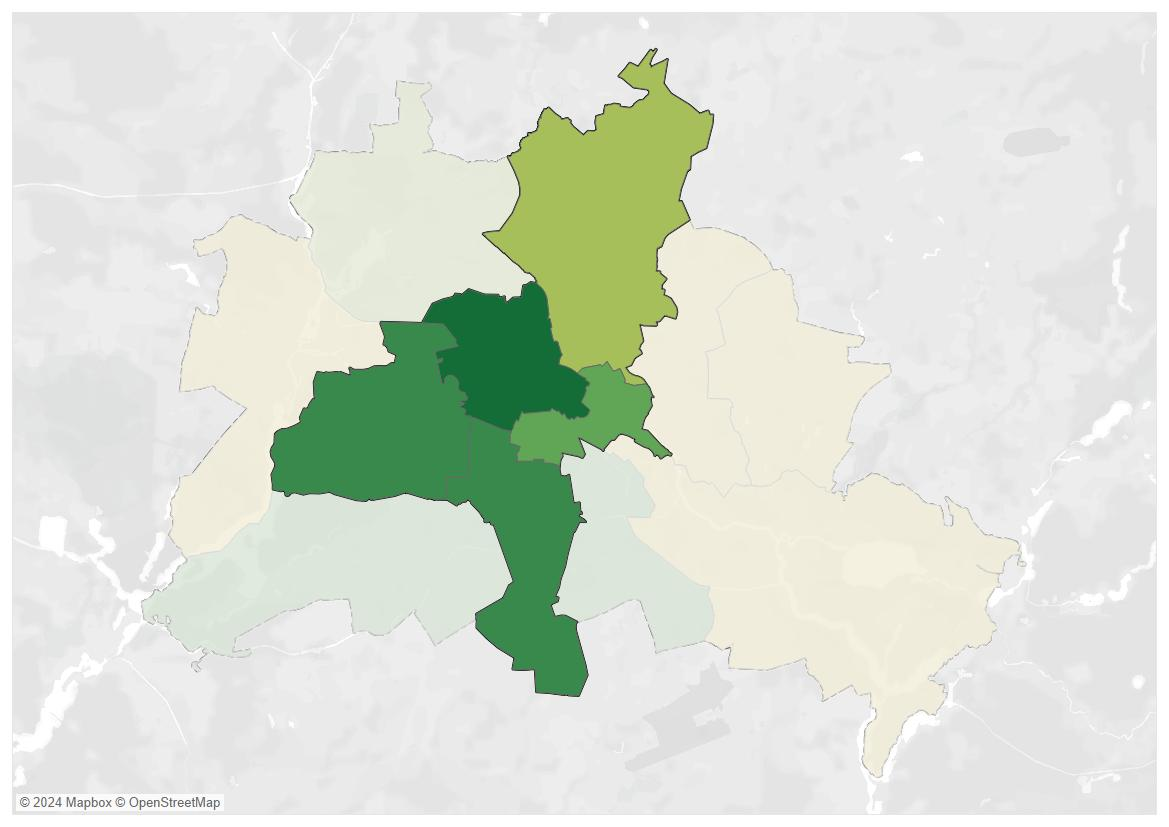

In [18]:

display(Image(filename='./04_Reveal_js/assets/010_Anna_MAP_02.jpg'))

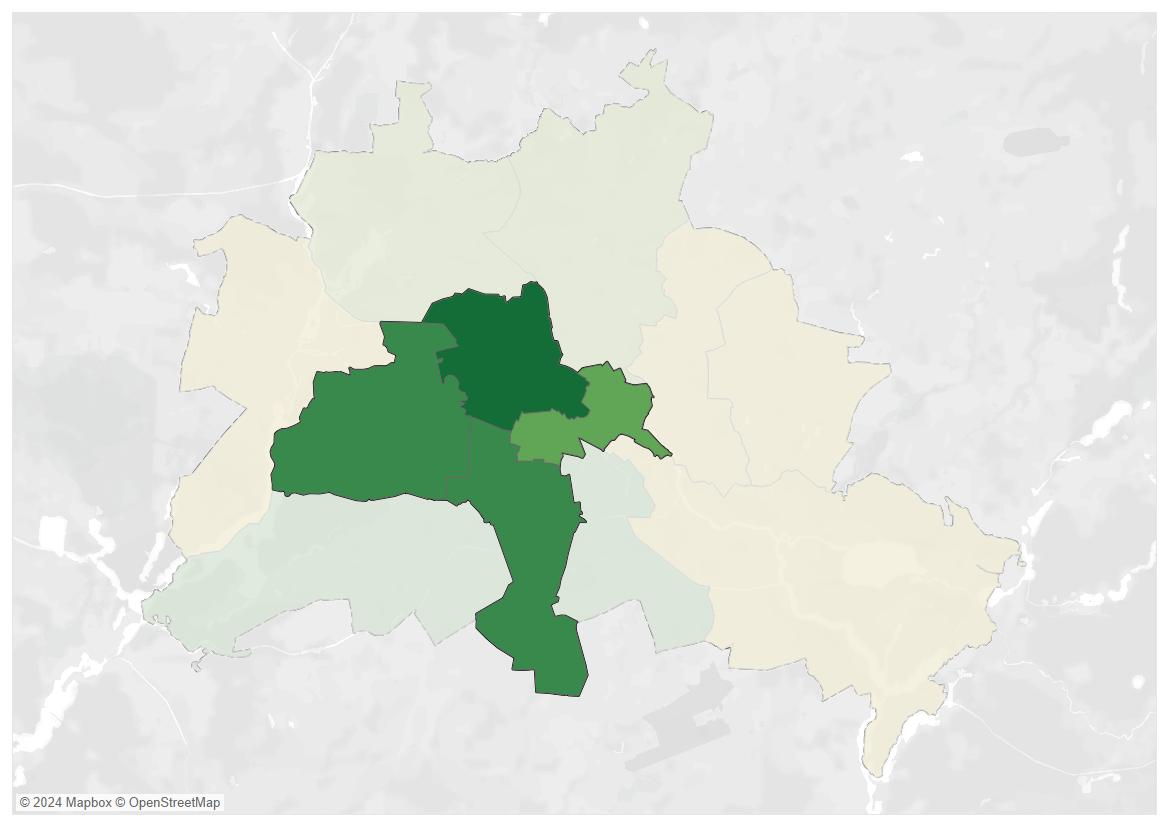

In [19]:

display(Image(filename='./04_Reveal_js/assets/010_Anna_MAP_03.jpg'))

Even further if we remember the tree map. Building on the insights from the tree map, Greek restaurants account for approximately 3% of all restaurants across Berlin. When we narrow our focus to the four neighborhoods identified earlier, it becomes clear that Charlottenburg and Schöneberg have a higher concentration of Greek restaurants, indicating greater competition in these areas. This insight provides valuable context for evaluating potential locations, balancing market demand with competitive presence.

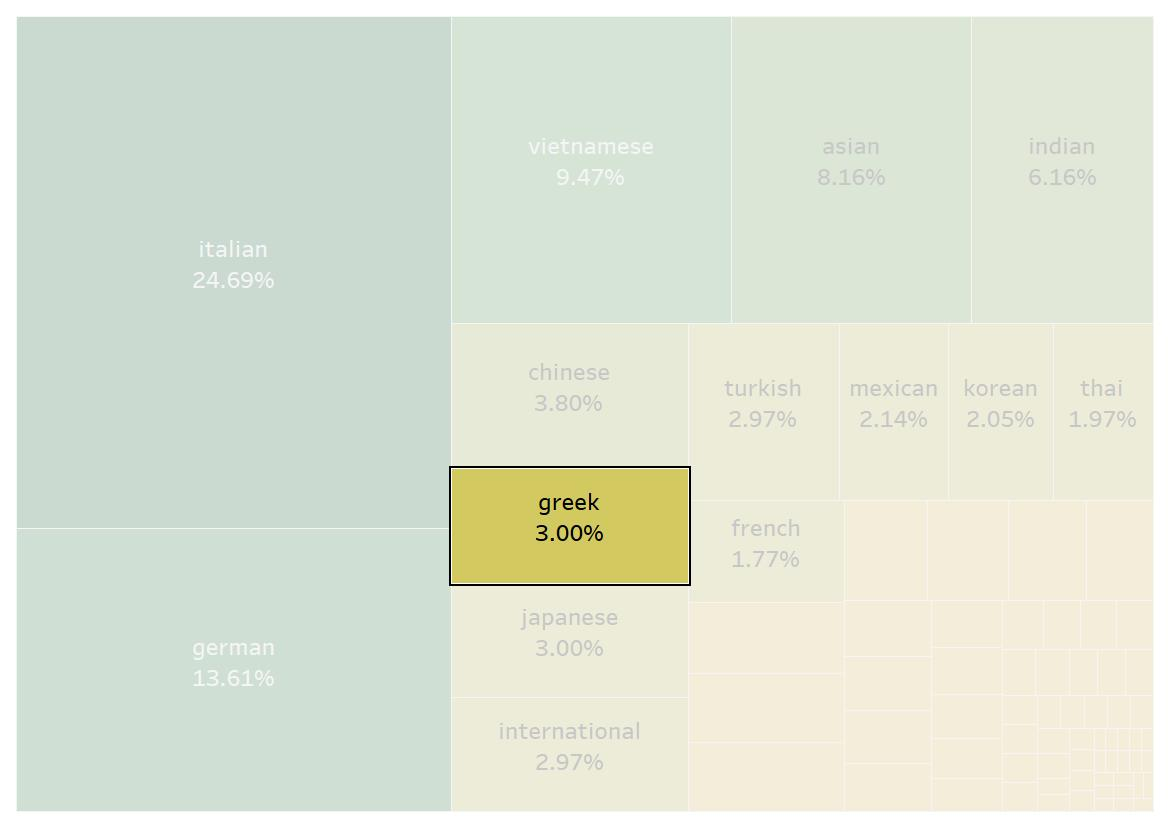

In [20]:

display(Image(filename='./04_Reveal_js/assets/010_Anna_Cuisines tree map.jpg'))

| Neighbourhood | Greek Restaurants as % of the Total Number of Restaurants |
| :---: | :---: |
| Tempelhof-Schöneberg | 4.52% |
| Charlottenburg-Wilmersdorf | 3.04% |
| Friedrichshain-Kreuzberg | 1.97% |
| Mitte | 0.94% |

By layering these factors—restaurant distribution, residential areas, transportation, and parking—we provide a comprehensive view of what makes a location ideal. The goal of this analysis isn’t to pinpoint a single location but to provide a framework for making informed, data-driven decisions. By considering demographics, restaurant density, and infrastructure, Anna—and others—can identify the best opportunities for success in Berlin’s competitive restaurant scene.